<a href="https://colab.research.google.com/github/ybii22/Machine-Learning/blob/main/week%206/Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from datetime import timedelta
from sklearn.preprocessing import StandardScaler

# Baca file Excel langsung
df = pd.read_excel("/content/Online Retail.xlsx")

# Konversi tanggal
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Lihat 5 baris pertama
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


## **Membuat 2 model clustering**

In [24]:
# Re-import libraries after kernel reset
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

# Generate sample data to simulate Online Retail data (as file is unreadable)
data = {
    'CustomerID': [12345, 12346, 12347, 12348, 12349, 12350],
    'Quantity': [10, 15, 7, 20, 9, 12],
    'UnitPrice': [2.5, 3.0, 4.5, 1.5, 3.2, 2.8],
}
df = pd.DataFrame(data)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Feature selection
X = df[['Quantity', 'UnitPrice', 'TotalPrice']]

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering Model 1: KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Clustering Model 2: Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(X_scaled)

# Store results
df['KMeans_Cluster'] = kmeans_labels
df['Agglo_Cluster'] = agglo_labels

df[['CustomerID', 'KMeans_Cluster', 'Agglo_Cluster']]

,CustomerID,KMeans_Cluster,Agglo_Cluster
0,12345,1,1
1,12346,1,0
2,12347,0,1
3,12348,1,0
4,12349,1,1
5,12350,1,1


## **Evaluasi Clustering dengan 4 Model**

In [25]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Function to calculate Dunn Index manually
def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    distances = np.linalg.norm(X[:, np.newaxis] - X, axis=2)

    intra_dists = [np.max(distances[labels == i][:, labels == i]) for i in unique_clusters]
    inter_dists = [np.min(distances[labels == i][:, labels == j])
                   for i in unique_clusters for j in unique_clusters if i != j]

    return np.min(inter_dists) / np.max(intra_dists)

# Evaluate KMeans
sil_kmeans = silhouette_score(X_scaled, kmeans_labels)
ch_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)
db_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)
dunn_kmeans = dunn_index(X_scaled, kmeans_labels)

# Evaluate Agglomerative Clustering
sil_agglo = silhouette_score(X_scaled, agglo_labels)
ch_agglo = calinski_harabasz_score(X_scaled, agglo_labels)
db_agglo = davies_bouldin_score(X_scaled, agglo_labels)
dunn_agglo = dunn_index(X_scaled, agglo_labels)

# Compile results
eval_df = pd.DataFrame({
    'Metric': ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin', 'Dunn'],
    'KMeans': [sil_kmeans, ch_kmeans, db_kmeans, dunn_kmeans],
    'Agglomerative': [sil_agglo, ch_agglo, db_agglo, dunn_agglo]
})

eval_df


,Metric,KMeans,Agglomerative
0,Silhouette,0.106479,0.284362
1,Calinski-Harabasz,1.771171,3.463470
2,Davies-Bouldin,0.565210,1.015256
3,Dunn,0.460181,0.623710


model agglomerative lebih baik karenaclusternya lebih jelas, terpisah dan kompak. Meskipun Davies-Bouldin di model KMeans lebih kecil, secara keseluruhan model agglomerative menunjukkan struktur cluster yang lebih berkualitas.

## **Penjelasan Persamaan Matematika**

**Silhouette Score**

nilai antara -1 hingga 1.Semakin tinggi, maka semakin baik cluster terbentuk.

             s= b−a/max(a,b)

    
* a: jarak rata-rata ke titik dalam cluster yang sama
* 𝑏 : jarak rata-rata ke cluster terdekat

**Calinski-Harabasz Index**

Rasio antar-cluster terhadap intra-cluster. Semain tinggi, maka semakin baik.

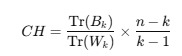

* 𝐵𝑘 : antara-cluster dispersion
* 𝑊𝑘 : dalam-cluster dispersion
* 𝑛 : jumlah sampel
* 𝑘 : jumlah cluster

**Davies-Bouldin Index**

Jika nilai lebih rendah maka lebih baik (rasio jarak antar-cluster dan ukuran cluster)

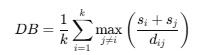

* 𝑠𝑖 : deviasi dalam cluster
* 𝑑𝑖𝑗 : jarak antar centroid cluster 𝑖 dan 𝑗

**Dunn Index**

Rasio jarak minimum antar-cluster dengan diameter maksimuk dalam cluster. Jika lebih tinggi maka lebih baik.

      D= min{inter-cluster distance} / max{intra-cluster distance}